In [1]:
import pandas as pd

df = pd.read_csv("clover_random_test.csv")
df.head()

,testname,git_hash,git_committer,git_committed_date,git_repo_name,version,Task Count,Thread Count,x_cells,y_cells,...,Cell Advection,Momentum Advection,Reset,Summary,Visit,Tile Halo Exchange,Self Halo Exchange,MPI Halo Exchange,Total,The Rest
0,random_test,0fdb917bf10d20363dd8b88d762851908643925b,caxwl,2021-08-09,UK-MAC/CloverLeaf_ref,1.3,4,4,960,960,...,0.1369,0.3139,0.0339,0.0022,0.0,0.0001,0.2134,0.5226,1.6218,0.0003
1,random_test,1398cd9cfa7570db9c8eb7a17a2f3e698c90aeb4,GitHub,2021-08-03,UK-MAC/CloverLeaf_ref,1.3,4,4,960,960,...,0.1288,0.3257,0.0311,0.0016,0.0,0.0002,0.2176,0.4954,1.5844,0.0003
2,random_test,158e23d08f73d36f71e144851451955b3ae02dff,mohan002,2021-08-03,UK-MAC/CloverLeaf_ref,1.3,4,4,960,960,...,0.1369,0.3030,0.0323,0.0021,0.0,0.0002,0.2011,0.5384,1.6110,0.0003
3,random_test,2efdde26ab1eef67dfce5a29163e8d513b6dffc4,jdshanks,2020-08-20,UK-MAC/CloverLeaf_ref,1.3,4,4,960,960,...,0.1439,0.2851,0.0389,0.0069,0.0,0.0003,0.1667,0.5370,1.6048,0.0003
4,random_test,89cc919b28f687a25d30b44ddf547201da930c14,jdshanks,2020-07-14,UK-MAC/CloverLeaf_ref,1.3,4,4,960,960,...,0.1242,0.3041,0.0302,0.0019,0.0,0.0001,0.2165,0.5463,1.6025,0.0003


In [35]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# ax = sns.lineplot(data=df[["PdV", "Cell Advection", "MPI Halo Exchange", "Self Halo Exchange", "Momentum Advection", "Total"]])
# ax.set_xticklabels([substring[:7] for substring in df["git_hash"]])
# ax.set_xlabel("Commit")
# ax.set_ylabel("Time (s)")
# ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
# plt.xticks(rotation=90)

['0fdb917', '1398cd9', '158e23d', '2efdde2', '89cc919', '07fcf4d', 'e37e1d7', '439c8d8', '3f88949', 'b5e598d', '821792e', '34869cb']


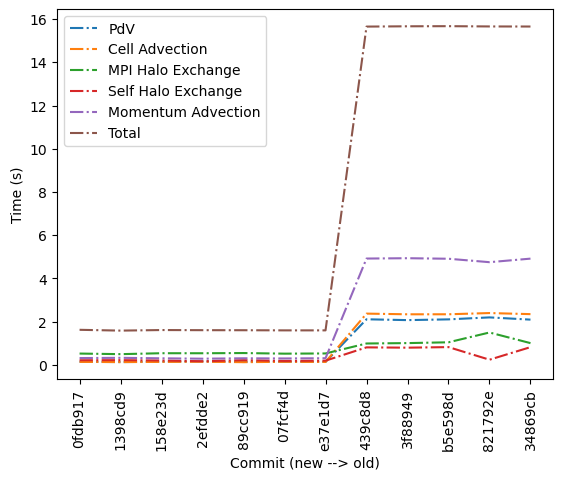

In [2]:
# from ipywidgets import *
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
%matplotlib inline 

# get_ipython().run_line_magic('matplotlib', 'inline')
def on_move(event):
    if event.inaxes:
        print(f'data coords {event.xdata} {event.ydata},',
              f'pixel coords {event.x} {event.y}')


def on_click(event):
    if event.button is MouseButton.LEFT:
        print('disconnecting callback')
        plt.disconnect(binding_id)



sh_hash = [substring[:7] for substring in df["git_hash"]]
for col in ["PdV", "Cell Advection", "MPI Halo Exchange", "Self Halo Exchange", "Momentum Advection", "Total"]:
    plt.plot(sh_hash, df[col], label=col, linestyle='dashdot')
plt.xticks(rotation=90)
plt.xlabel("Commit (new --> old)")
plt.ylabel("Time (s)")
plt.legend()

binding_id = plt.connect('motion_notify_event', on_move)
plt.connect('button_press_event', on_click)

plt.show()

In [60]:
def create_git_comapre_link(df, row1, row2):
    return "https://github.com/" + df.iloc[row1]["git_repo_name"] + "/compare/" + df.iloc[row1]["git_hash"][:7] + ".." + df.iloc[row2]["git_hash"][:7]

# https://github.com/UK-MAC/CloverLeaf_ref/compare/e37e1d7..439c8d8 (old .. new)
create_git_comapre_link(df, 7,6)

'https://github.com/UK-MAC/CloverLeaf_ref/compare/439c8d8..e37e1d7'

In [1]:
import altair as alt

In [35]:
import sqlite3
import pandas as pd
# Create your connection.
cnx = sqlite3.connect('clover_random_test.db')
str_query = "SELECT * FROM TABLENAME WHERE total != 'None'"
df = pd.read_sql_query(str_query, cnx)
df

,testname,git_hash,git_committer,git_committed_date,git_repo_name,version,Task_Count,Thread_Count,x_cells,y_cells,...,momentum_advection,reset,summary,visit,tile_halo_exchange,self_halo_exchange,mpi_halo_exchange,total,the_rest,end_time
0,random_test,0fdb917bf10d20363dd8b88d762851908643925b,caxwl@hotmail.com,2021-08-09,UK-MAC/CloverLeaf_ref,1.300,4,4,960,960,...,0.3296,0.0319,0.0021,0.0000,0.0002,0.2158,0.5144,1.6256,0.0003,None
1,random_test,1398cd9cfa7570db9c8eb7a17a2f3e698c90aeb4,noreply@github.com,2021-08-03,UK-MAC/CloverLeaf_ref,1.300,4,4,960,960,...,0.3281,0.0338,0.0022,0.0000,0.0001,0.2211,0.5128,1.6688,0.0002,None
2,random_test,158e23d08f73d36f71e144851451955b3ae02dff,mohbabul@amd.com,2021-08-03,UK-MAC/CloverLeaf_ref,1.300,4,4,960,960,...,0.2922,0.0398,0.0051,0.0000,0.0003,0.1758,0.5381,1.6087,0.0002,None
3,random_test,2efdde26ab1eef67dfce5a29163e8d513b6dffc4,douglas.j.shanks@bath.edu,2020-08-20,UK-MAC/CloverLeaf_ref,1.300,4,4,960,960,...,0.3167,0.0343,0.0019,0.0000,0.0001,0.2393,0.5183,1.6270,0.0003,None
4,random_test,89cc919b28f687a25d30b44ddf547201da930c14,douglas.j.shanks@bath.edu,2020-07-14,UK-MAC/CloverLeaf_ref,1.300,4,4,960,960,...,0.3343,0.0326,0.0021,0.0000,0.0001,0.2282,0.5111,1.6381,0.0002,None
5,random_test,07fcf4d773ba7626e6ea36c7002f7b2cd7c76b2a,douglas.j.shanks@bath.edu,2020-07-14,UK-MAC/CloverLeaf_ref,1.300,4,4,960,960,...,0.3174,0.0327,0.0022,0.0000,0.0001,0.2069,0.5040,1.5950,0.0003,None
6,random_test,e37e1d7aab99070a65094e784721b4d05fb86444,douglas.j.shanks@bath.edu,2020-07-14,UK-MAC/CloverLeaf_ref,1.300,4,4,960,960,...,0.3194,0.0333,0.0022,0.0000,0.0001,0.2115,0.5052,1.6212,0.0003,None
7,random_test,439c8d846ede012c89f7be451763a32dbaa5eb2c,noreply@github.com,2020-07-13,UK-MAC/CloverLeaf_ref,1.300,4,4,3840,3840,...,4.7780,0.5640,0.0814,0.0000,0.0003,0.2112,1.5413,15.7986,0.0004,0.55
8,random_test,3f889495db94c6fba5a5ec1f9937f49e8b66f94d,olly.perks@arm.com,2020-07-13,UK-MAC/CloverLeaf_ref,1.300,4,4,3840,3840,...,5.0339,0.5212,0.0357,0.0000,0.0003,0.8170,1.0099,15.8006,0.0005,0.55
9,random_test,b5e598dc0f10ca804dce4a748e3c2314545269cd,noreply@github.com,2020-07-03,UK-MAC/CloverLeaf_ref,1.300,4,4,3840,3840,...,4.9231,0.5240,0.0308,0.0000,0.0003,0.7391,1.1374,15.7733,0.0030,0.55


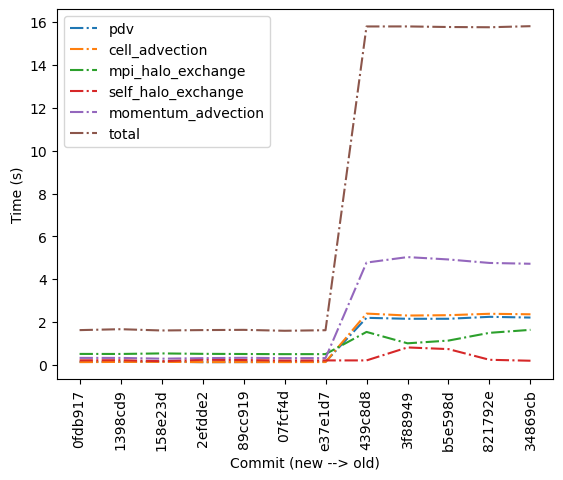

In [33]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
%matplotlib inline 

sh_hash = [substring[:7] for substring in df["git_hash"]]
for col in ["pdv", "cell_advection", "mpi_halo_exchange", "self_halo_exchange", "momentum_advection", "total"]:
    plt.plot(sh_hash, pd.to_numeric(df[col]), label=col, linestyle='dashdot')
plt.xticks(rotation=90)
plt.xlabel("Commit (new --> old)")
plt.ylabel("Time (s)")
plt.legend()


plt.show()